In [70]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

### group members:
- thwisha nahender - tn130
- medha sreenivasan - ms1112

In [55]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/d0/67/ebbc7e0c6da1753d7c30c2ca47c6bd11dbf2259cfa9c98151f4ab3d8b950/wordcloud-1.9.3-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   -- ------------------------------------- 20.5/300.6 kB 73.1 kB/s eta 0:00:04
   --- ----------------------------------- 30.7/300.6 kB 146.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.6 kB 234.9 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/300.6 kB 386.4 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.6 kB 761.1 kB/s eta 0:00:01
   -------------------------------------- 300.6/300.6 kB 885.2 kB/s eta 0:00:00


In [71]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string

## Synthetic Data Generation

In [72]:
## data preprocessing steps 
## 1. convert to lower case
## 2. remove the stop words from the review 
## 3. remove punctuations 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('br','')
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)


### preprocessing real data

In [73]:
## read the dataset 
movie_data = pd.read_csv('IMDB_Dataset.csv')
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [74]:
X_train, X_test, y_train, y_test = train_test_split(movie_data['review'], movie_data['sentiment'], 
                                                    test_size=0.33, random_state=42,stratify=movie_data['sentiment'])

In [75]:
X_train_clean = X_train.apply(preprocess_text)
X_test_clean = X_test.apply(preprocess_text)

In [76]:
y_train = [1 if sentiment == 'positive' else 0 for sentiment in y_train]
y_test = [1 if sentiment == 'positive' else 0 for sentiment in y_test]

In [77]:
X_train_tokenized=X_train_clean.apply(lambda x: x.split())
X_test_tokenized=X_test_clean.apply(lambda x: x.split())

In [78]:
##2. we have to create feature vectors before training
vectorizer = CountVectorizer()      
X_train_vectorized = vectorizer.fit_transform(X_train_clean)
X_test_counts = vectorizer.transform(X_test_clean)

In [79]:
X_train_tokenized

44272    [sure, making, good, film, storyline, good, bi...
33427    [miniseries, iconic, australian, spirit, may, ...
36331    [see, cover, dvd, youre, convinced, class, b, ...
25718    [saw, documentary, disappointed, see, serbian,...
40140    [abysmal, indonesian, action, film, legendary,...
                               ...                        
39654    [disappointed, show, hearing, reading, hoopla,...
22917    [first, time, saw, shade, sneakpreview, hadnt,...
47481    [waste, time, danger, watch, tempted, tear, dv...
35597    [far, pathetic, movie, indian, cinema, cinema,...
27491    [movie, forever, left, impression, watched, fr...
Name: review, Length: 33500, dtype: object

In [80]:
flattened_words = [word for sublist in X_train_tokenized for word in sublist]
words = " ".join(flattened_words)

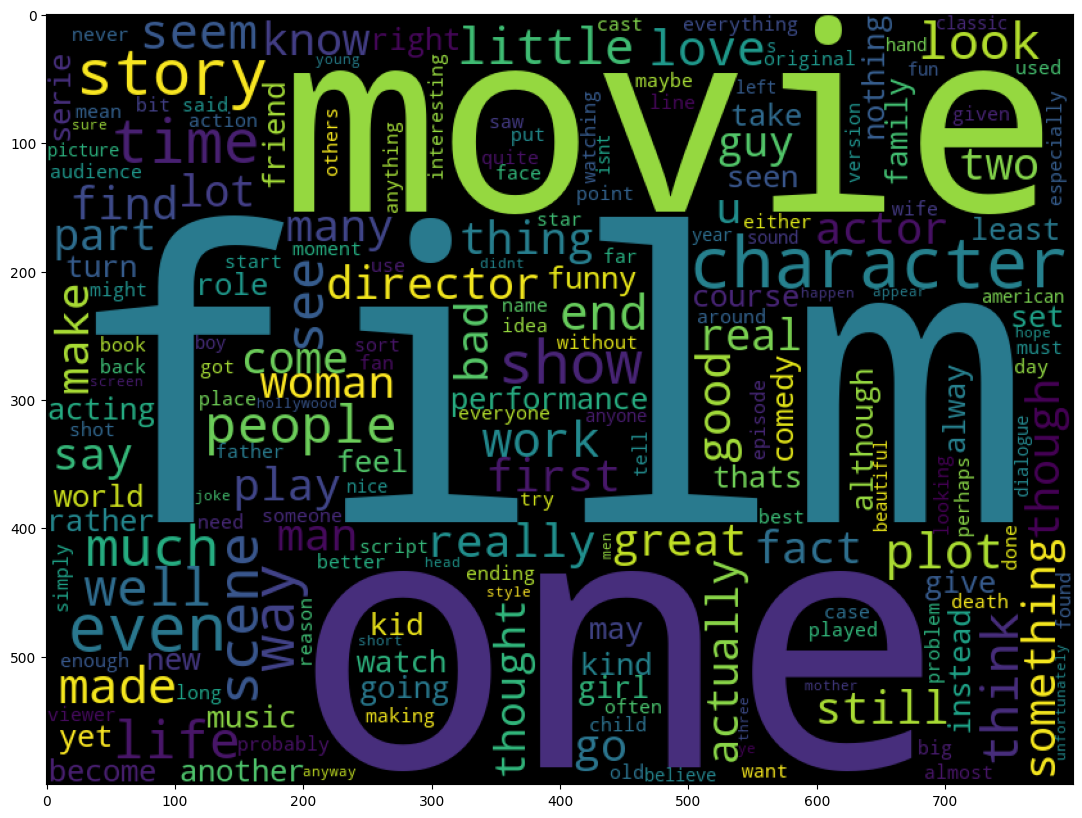

In [59]:
all_reviews_text = words.lower()
wc=WordCloud(width=800,height=600,max_words=200,regexp="[a-z']+")
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))

In [23]:
data = pd.DataFrame(X_train_tokenized)
data['label'] = y_train
data.head()

,review,label
44272,"[sure, making, good, film, storyline, good, bi...",0
33427,"[miniseries, iconic, australian, spirit, may, ...",1
36331,"[see, cover, dvd, youre, convinced, class, b, ...",1
25718,"[saw, documentary, disappointed, see, serbian,...",0
40140,"[abysmal, indonesian, action, film, legendary,...",0


In [25]:
from collections import Counter
cnt = Counter()
for text in X_train_clean:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,67603
1,film,61323
2,one,36064
3,like,26547
4,time,20214
5,good,19416
6,character,18831
7,story,16634
8,even,16436
9,get,16413


In [26]:
df = pd.DataFrame(data)

# initialize dictionaries to store word counts and word probabilities by class
word_counts_by_class = {0: Counter(), 1: Counter()}
word_probs_by_class = {0: Counter(), 1: Counter()}

## generate the word probabilities 
for index, row in df.iterrows():
    label = row['label']
    for word in row['review']:
        # Count word occurrences by class
        word_counts_by_class[label][word] += 1


In [27]:

# calculate word probabilities by class
for label, word_counts in word_counts_by_class.items():
    total_words = sum(word_counts.values())
    print('class:',label,'count:',total_words)
    for word, count in word_counts.items():
        word_probs_by_class[label][word] = count / total_words

class: 0 count: 1988594
class: 1 count: 2022498


In [30]:
# generate synthetic data based on Naive Bayes probabilities
def generate_data(num_samples, prior_prob, likelihood_prob):
    synthetic_data = []
    for _ in range(num_samples):
        label = np.random.choice([0, 1], p=prior_prob)
        sequence_length = np.random.randint(10, 200 + 1)
        sample = ''
        for _ in range(sequence_length):
            feature = np.random.choice(list(likelihood_prob[label].keys()), p=list(likelihood_prob[label].values()))
            sample= sample + ' ' + feature
        
        synthetic_data.append({'review': sample, 'label': label})
    return synthetic_data

# prior probabilities
prior_probabilities = [0.5, 0.5] 


# Generate synthetic data
num_samples = 1000
synthetic_data = generate_data(num_samples, prior_probabilities, word_probs_by_class)



In [35]:
synthetic_data_df = pd.DataFrame(synthetic_data)
synthetic_data_df.head()

,review,label
0,hickok see perfect overhead man pretentious r...,1
1,high film idea problem even bush porn helping...,0
2,grave one supposed message make audience mixe...,0
3,another clear novelist film solitude movie wi...,1
4,book standard smart energy drowning show mess...,1


In [36]:
synthetic_data_df.to_csv('synthetic_data.csv',index=False)

### preprocessing synthetic data

In [85]:
synthetic_df_read = pd.read_csv('synthetic_data.csv')
synthetic_df_read.head()

,review,label
0,hickok see perfect overhead man pretentious r...,1
1,high film idea problem even bush porn helping...,0
2,grave one supposed message make audience mixe...,0
3,another clear novelist film solitude movie wi...,1
4,book standard smart energy drowning show mess...,1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(synthetic_df_read['review'], synthetic_df_read['label'], 
                                                    test_size=0.33, random_state=42,stratify=synthetic_df_read['label'])

In [87]:
X_train_clean_synth = X_train.apply(preprocess_text)
X_test_clean_synth = X_test.apply(preprocess_text)

In [88]:
X_train_tokenized_synth=X_train_clean_synth.apply(lambda x: x.split())
X_test_tokenized_synth=X_test_clean_synth.apply(lambda x: x.split())

In [64]:
X_train_tokenized_synth

414    [fonda, string, showed, fore, might, must, det...
77     [marry, see, dock, film, watch, said, set, hug...
245    [exceptional, achieve, film, like, act, increa...
861    [poor, like, bonus, michael, improvement, real...
466    [get, surprise, like, else, honestly, scholars...
                             ...                        
652    [moving, depth, lament, tale, truly, day, litt...
675    [really, bug, workjust, ever, traveling, direc...
937    [either, man, well, demon, countless, van, kno...
63     [appearance, time, serf, must, allen, therein,...
558    [lying, started, firstshe, able, spot, series,...
Name: review, Length: 670, dtype: object

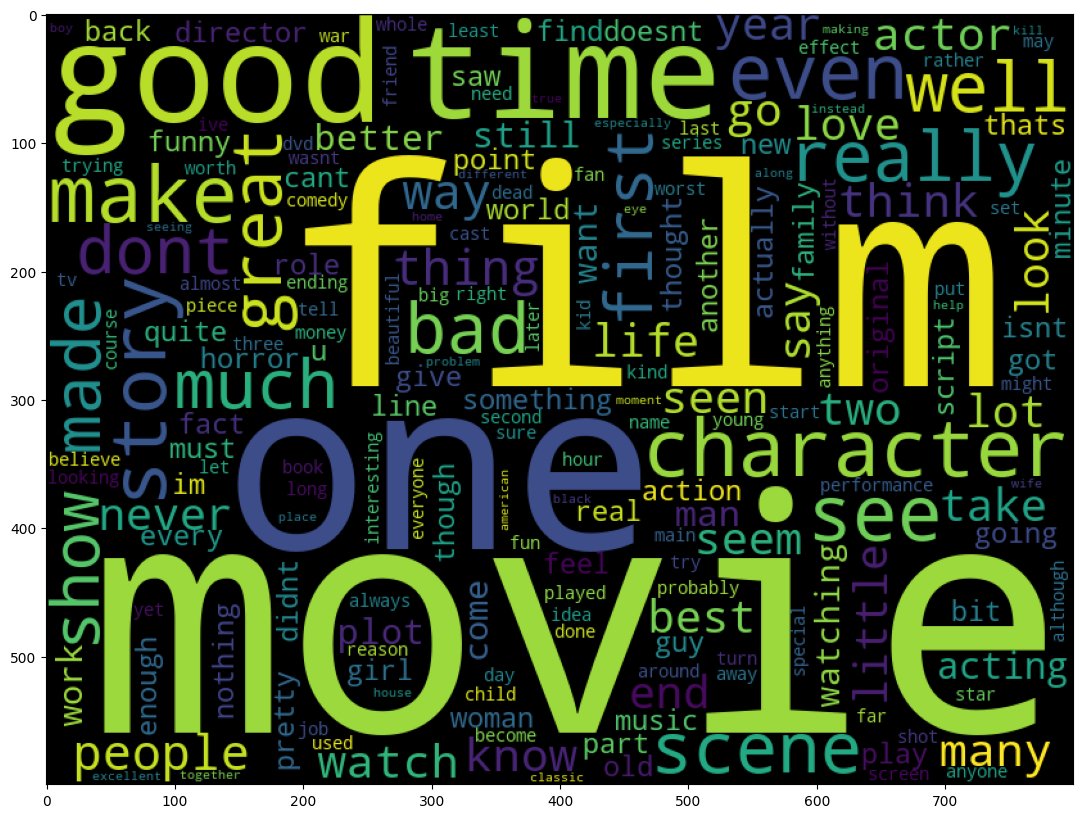

In [65]:
flattened_words_synth = [word for sublist in X_train_tokenized_synth for word in sublist]
words_synth = " ".join(flattened_words_synth)


all_reviews_text = words_synth.lower()
wc=WordCloud(width=800,height=600,max_words=200,regexp="[a-z']+")
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))

In [89]:
##2. we have to create feature vectors before training
vectorizer = CountVectorizer()      
X_train_vectorized = vectorizer.fit_transform(X_train_clean_synth)
X_test_counts = vectorizer.transform(X_test_clean_synth)

In [90]:
nb_classifier_onsynth = MultinomialNB()
nb_classifier_onsynth.fit(X_train_vectorized,y_train)

MultinomialNB()

In [91]:
predictions = nb_classifier_onsynth.predict(X_test_counts)
acc_counts = sum([1 if pred == actual else 0 for pred,actual in zip(predictions,y_test)])
acc_counts/len(y_test)

0.8848484848484849

In [93]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions)

0.8749999999999999

In [94]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions)

0.8159509202453987

In [95]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions)

0.9432624113475178

### qualitative analysis

In [106]:
def get_transformed_test_data(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('br','')
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    clean_text = " ".join(filtered_tokens)
    vector_text = vectorizer.transform(list([clean_text]))
    return vector_text
    

In [108]:
review = 'I enjoyed the movie!'
label = nb_classifier_onsynth.predict(get_transformed_test_data(review))
print(['positive' if label == 1 else 'negative'])

['positive']


In [109]:
review = 'I hated the acting and the plot!'
label = nb_classifier_onsynth.predict(get_transformed_test_data(review))
print(['positive' if label == 1 else 'negative'])

['negative']


In [110]:
review = 'i did not love the vibrant colors in the movie'
label = nb_classifier_onsynth.predict(get_transformed_test_data(review))
print(['positive' if label == 1 else 'negative'])

['positive']


## Word Cloud Visualization

In [67]:
negative_labels = synthetic_df_read[synthetic_df_read['label']==0]
positive_labels = synthetic_df_read[synthetic_df_read['label']==1]

negative_labels_ = negative_labels['review'].apply(preprocess_text)
positive_labels_ = positive_labels['review'].apply(preprocess_text)

negative_labels_tokens=negative_labels_.apply(lambda x: x.split())
positive_labels_tokens=positive_labels_.apply(lambda x: x.split())

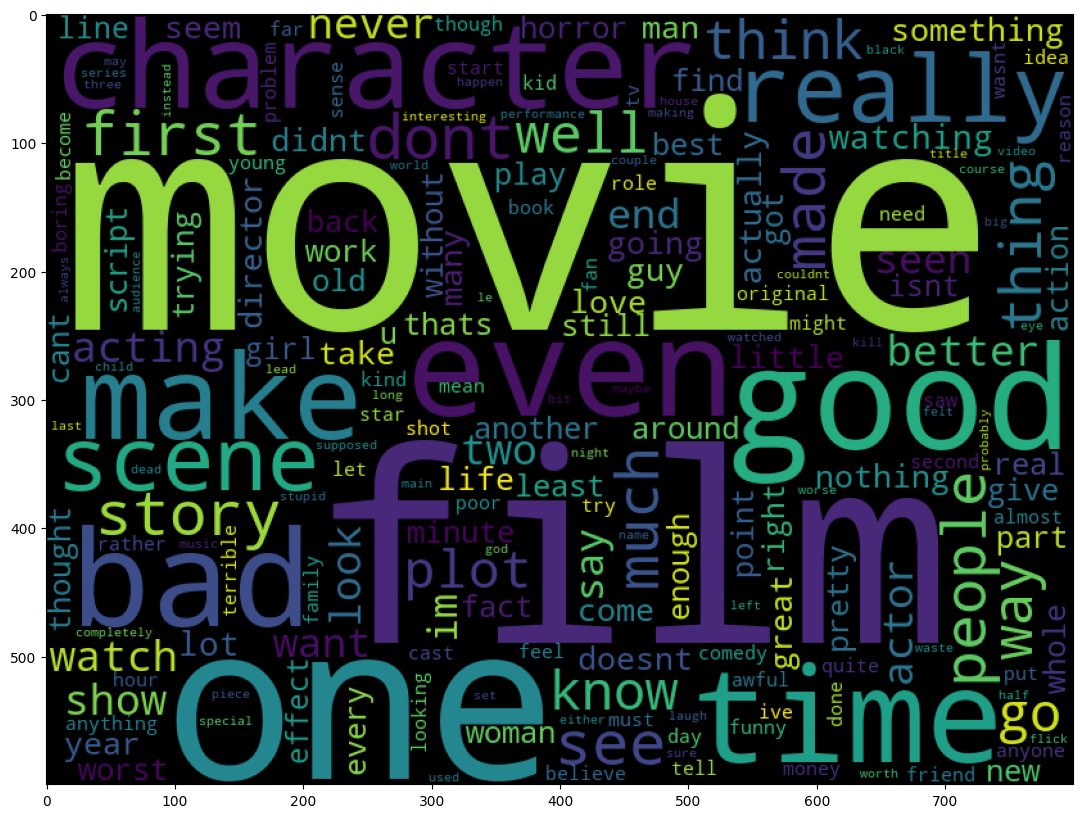

In [68]:
flattened_words_synth = [word for sublist in negative_labels_tokens for word in sublist]
words_synth = " ".join(flattened_words_synth)

all_reviews_text = words_synth.lower()
wc=WordCloud(width=800,height=600,max_words=200,regexp="[a-z']+")
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))

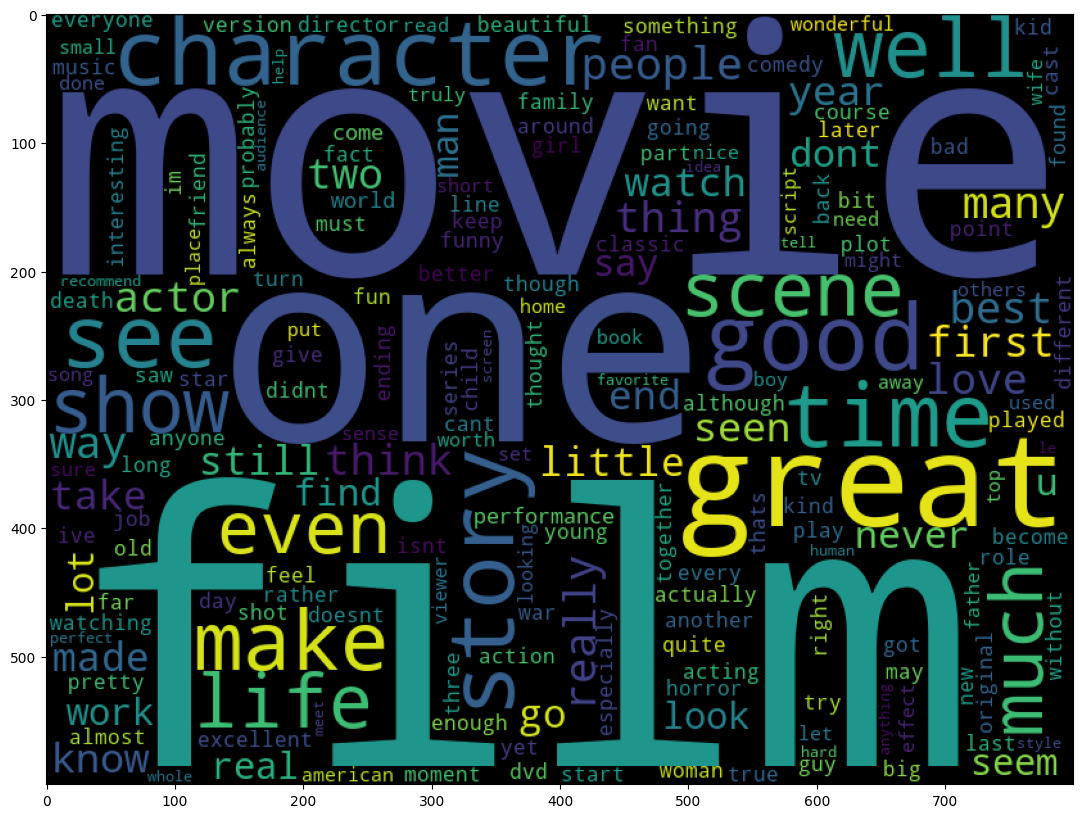

In [69]:
flattened_words_synth = [word for sublist in positive_labels_tokens for word in sublist]
words_synth = " ".join(flattened_words_synth)

all_reviews_text = words_synth.lower()
wc=WordCloud(width=800,height=600,max_words=200,regexp="[a-z']+")
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))

In [82]:
negative_labels = movie_data[movie_data['sentiment']=='negative']
positive_labels = movie_data[movie_data['sentiment']=='positive']

negative_labels_ = negative_labels['review'].apply(preprocess_text)
positive_labels_ = positive_labels['review'].apply(preprocess_text)

negative_labels_tokens=negative_labels_.apply(lambda x: x.split())
positive_labels_tokens=positive_labels_.apply(lambda x: x.split())

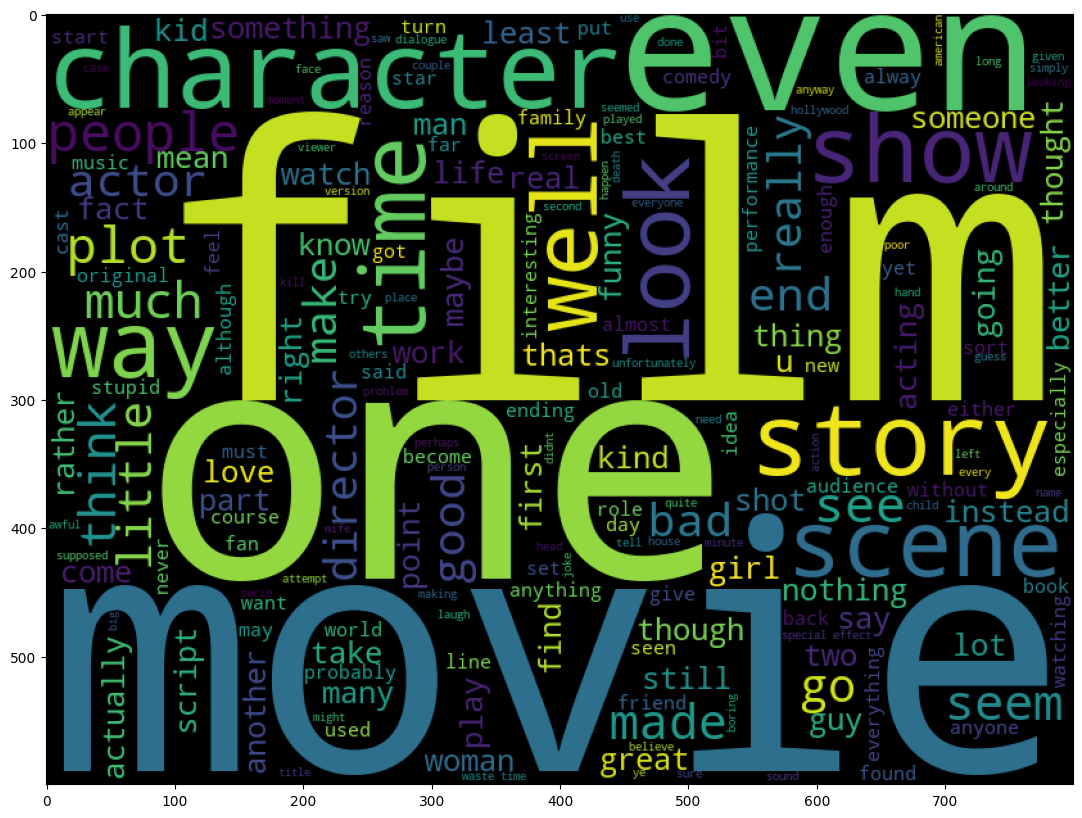

In [83]:
flattened_words_ = [word for sublist in negative_labels_tokens for word in sublist]
words_ = " ".join(flattened_words_)

all_reviews_text = words_.lower()
wc=WordCloud(width=800,height=600,max_words=200,regexp="[a-z']+")
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))

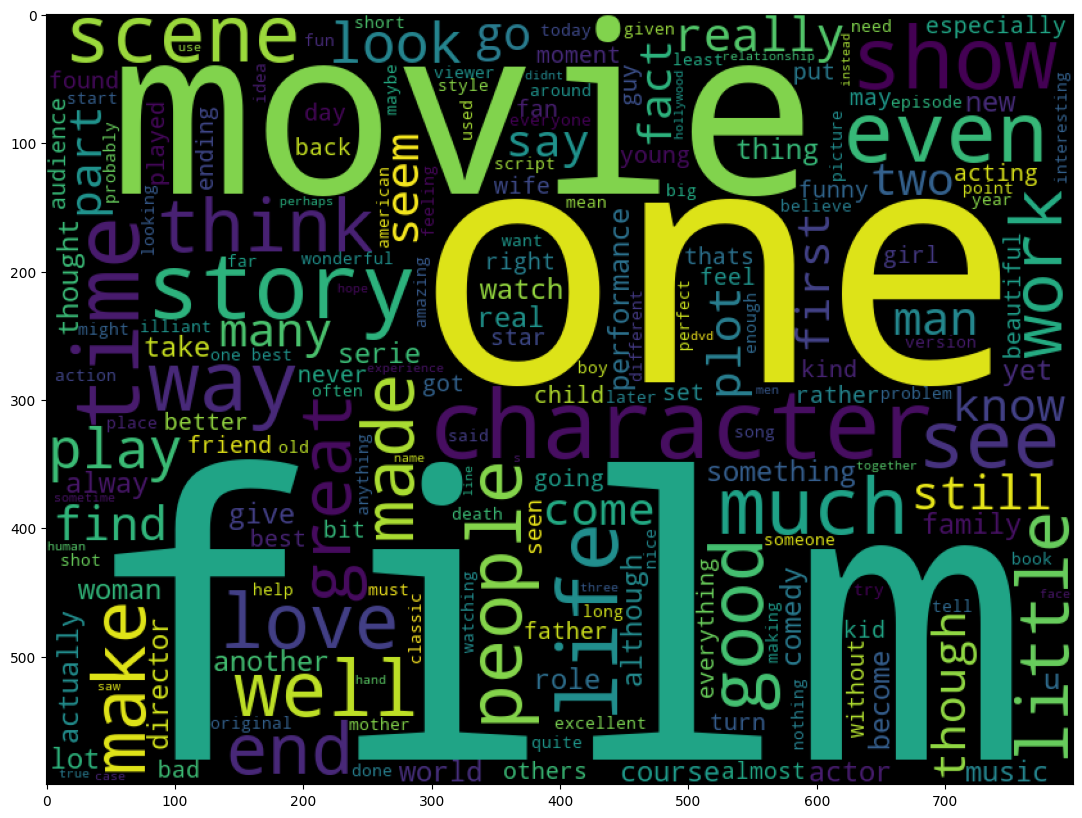

In [84]:
flattened_words_ = [word for sublist in positive_labels_tokens for word in sublist]
words_ = " ".join(flattened_words_)

all_reviews_text = words_.lower()
wc=WordCloud(width=800,height=600,max_words=200,regexp="[a-z']+")
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(all_reviews_text))